# Assignment 2.2 - Timeseries and Assessing the OLS Model

## DRW & UofC Quant Foundations
### Summer 2025
#### Mark Hendricks
#### hendricks@uchicago.edu

***

# Data
* This homework uses the file, `data/ols_forecasting_inflation_data.xlsx`.
* Find the data in the Github repo associated with the module, (link on Canvas.)

The data file contains...
* Macroeconomic Data
    - Core CPI price index, denoted as $p$. 
    - M2 Money Supply, denoted as $m$.
* Financial data
    - Returns on the S&P 500, (via the SPY ETF)
* See the “build data” folder for the details on how the data was constructed

$$\renewcommand{\spy}{\text{spy}}$$
$$\renewcommand{\hyg}{\text{hyg}}$$

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [15]:
macro = pd.read_excel('../data/ols_forecasting_inflation_data.xlsx', index_col=0, sheet_name='macro')
spy = pd.read_excel('../data/ols_forecasting_inflation_data.xlsx', index_col=0, sheet_name='s&p500')
macro

,CPI,M2
date,,
1959-01-31,29.010,286.6
1959-02-28,29.000,287.7
1959-03-31,28.970,289.2
1959-04-30,28.980,290.1
1959-05-31,29.040,292.2
...,...,...
2024-12-31,317.603,21441.8
2025-01-31,319.086,21520.0
2025-02-28,319.775,21613.8


In [16]:
spy

,SPY
Date,
1993-02-28,0.010669
1993-03-31,0.022399
1993-04-30,-0.025589
1993-05-31,0.026970
1993-06-30,0.003608
...,...
2024-12-31,-0.024060
2025-01-31,0.026856
2025-02-28,-0.012695


***

# 1. Assessing the OLS Model

This problem considers the predictability of inflation over various horizons. To do so, note the following:
* $i_{t,t+h}$: Inflation is the h-period growth rate of CPI: 

$$i_{t,t+h} ≡ \frac{p_{t+h}}{p_t} − 1$$

* $g_{t,t+h}$: Money growth considered below is the growth rate of M2 Money supply:

$$g_{t,t+h} ≡ \frac{m_{t+h}}{m_t} − 1$$

---
## 1.1 

Estimate an OLS regression to see if CPI and Money are contemporaneously correlated: 

$$p_t = \alpha + \beta m_t + \epsilon_t$$

* Note that this is not a lagged regression, but rather a contemporaneous time-series regression. (We are not predicting a period ahead but rather fitting one series to the other at the same time period.)

- (a) Report the estimated R-squared. 
- (b) Report the point-estimate of $\beta$.



In [17]:
X = macro['M2']
Y = macro['CPI']

X = sm.add_constant(X)  # Adds a constant term to the predictor
cpi_model = sm.OLS(Y, X).fit()  # Fit the model
print(cpi_model.summary())  # Print the summary of the regression results

print('R-squared:', cpi_model.rsquared)
print('Beta coefficients', cpi_model.params)

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     4282.
Date:                Sun, 29 Jun 2025   Prob (F-statistic):          4.35e-322
Time:                        23:32:15   Log-Likelihood:                -3921.7
No. Observations:                 796   AIC:                             7847.
Df Residuals:                     794   BIC:                             7857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.9597      1.625     41.194      0.0

$R^2 = 0.844$ //
$\beta = 0.013$

there is high correlation betweeen the two (high R^2 and low p value)

---
## 1.2

This time, examine a regression of growth rates. Specifically, estimate an OLS regression to see if inflation and money growth are contemporaneously correlated:

$$i_{t,t+h} = \alpha + \beta g_{t,t+h} + \epsilon_{t,t+h}$$

* Note that this is not a lagged regression, but rather a regular time-series regression.

Answer the questions below for a one-year horizon: $h = 12$. 
- (a) Report the estimated R-squared.
- (b) Report the point-estimate of $\beta$.



In [18]:
#Calculate inflation and money growth for one-year horizon
inflation = Y.pct_change(12).dropna()
money_growth = X['M2'].pct_change(12).dropna()

X = sm.add_constant(money_growth)  # Adds a constant term to the predictor
inflation_model = sm.OLS(inflation, X).fit()  # Fit the model
print(inflation_model.summary())  # Print the summary of the regression results

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.778
Date:                Sun, 29 Jun 2025   Prob (F-statistic):             0.0523
Time:                        23:32:15   Log-Likelihood:                 1692.9
No. Observations:                 784   AIC:                            -3382.
Df Residuals:                     782   BIC:                            -3373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0341      0.002     16.579      0.0

---
## 1.3

The result of regressing inflation on money growth is very different from regressing CPI on Money. 

- (a) What do you conclude? 
- (b) Does it seem that variation in money contemporaneously explains variation in inflation?
- (c) In particular, what is wrong with one of the two regression models? Consider plotting the raw dependent and independent variable of each.



Although Cpi and money seem to be correlated (they both grow consistently over time (trend)), the individual growth rates (inflation and money growth) are not correlated at all. Therefore we can conclude that variation in money does not contemporaneously explain variation in inflation. This is not a good model for trending data

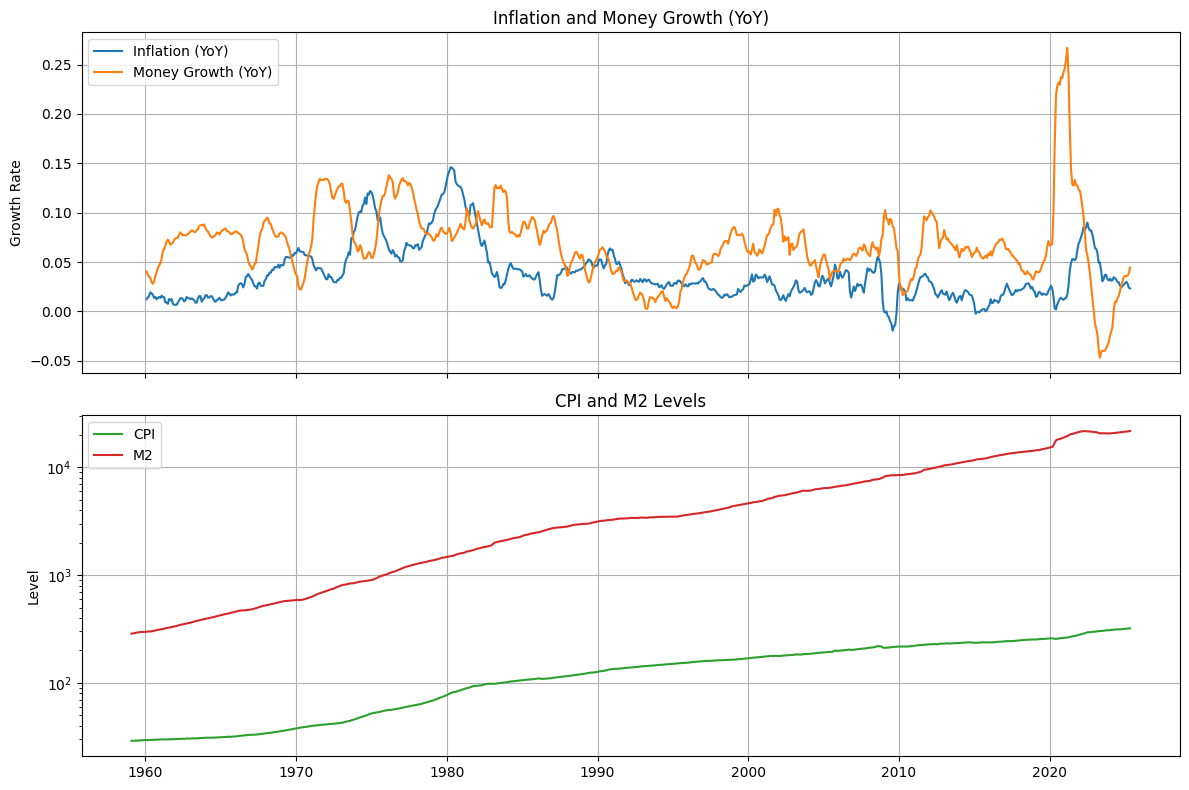

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# First plot: inflation and money growth
axs[0].plot(inflation.index, inflation, label='Inflation (YoY)', color='tab:blue')
axs[0].plot(money_growth.index, money_growth, label='Money Growth (YoY)', color='tab:orange')
axs[0].set_ylabel('Growth Rate')
axs[0].set_title('Inflation and Money Growth (YoY)')
axs[0].legend()
axs[0].grid(True)

# Second plot: M2 and CPI (levels)
axs[1].plot(macro.index, macro['CPI'], label='CPI', color='tab:green')
axs[1].plot(macro.index, macro['M2'], label='M2', color='tab:red')
axs[1].set_ylabel('Level')
axs[1].set_title('CPI and M2 Levels')
axs[1].set_yscale('log')  # Log scale for better visibility
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

---
## 1.4

Answer the remaining questions regarding the estimation of inflation on money growth in 1.2 above.

Do the sample residuals, $e$ seem to be iid? That is,
- (a) do they seem to be drawn from a constant variance? 
- (b) do they have serial correlation?

Assess this informally by plotting the time-series of estimated sample residuals, $e$.

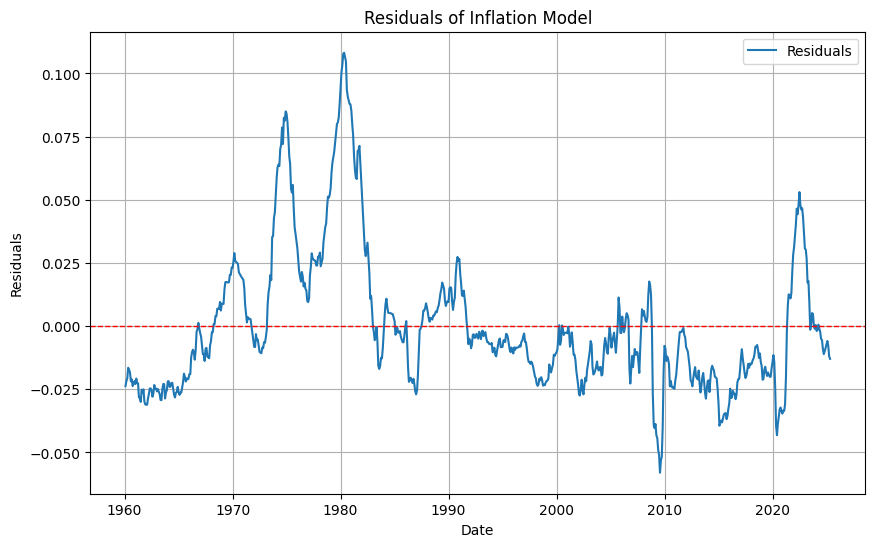

In [20]:
residuals = inflation_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals.index, residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals of Inflation Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

The residuals do not seem to be iid (independently and identically distributed) this is because if the previous step had a high residual, the current residual is more likely to be high (for example). This therefore points towards serial correlation. We can also say that variance is not constant, looking at early 1960s vs late 1970s.

---
## 1.5


Suppose that the residuals do not fit the classic OLS assumptions. (Technically speaking, consider that they are heteroskedastic and have serial correlation.)

- (a) Report whether the estimates for $\alpha$ or $\beta$ are statistically significant relative to 0, for a significance level of 5%. (Check the reported p-value for each of the estimates, perhaps using stats-models OLS function.)
- (b) Do you have concerns about the accuracy of the reported p-values?
- (c) Do you have concerns about the estimated beta? For small samples, for large samples?



In [21]:
print(inflation_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.778
Date:                Sun, 29 Jun 2025   Prob (F-statistic):             0.0523
Time:                        23:32:16   Log-Likelihood:                 1692.9
No. Observations:                 784   AIC:                            -3382.
Df Residuals:                     782   BIC:                            -3373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0341      0.002     16.579      0.0

$\alpha \neq 0$ is statistically significant, $\beta \neq 0$ is not so we can conclude that $\alpha$ is near 0.034 and $\beta$ is near zero

We do have concerns about the reported p-values, because the residuals do not follow the assumptions used to calculate those values. 

Heteroskedasticity does not change the estimated beta. The serial correlation could be causing bias in the estimates of beta

---
## 1.6

- (a) Assess the residuals with the Durbin-Watson test for serial correlation. 
- (b) Formally assess heteroskedasticity of the residuals with White’s test.

### Hints

- (a) This is reported by default in the stats-models OLS estimation summary. A value less than 2 would indicate potential issues with serial correlation.
- (b) See the documentation for the stats-model package.



In [22]:
print('Durbin-Watson statistic:', sm.stats.durbin_watson(inflation_model.resid))

# Check for autocorrelation in residuals
lm_stat, lm_pvalue, f_stat, f_pvalue= sm.stats.diagnostic.het_white(inflation_model.resid, inflation_model.model.exog)
print('White test for heteroscedasticity - \nLM statistic:', lm_stat, 'p-value:', lm_pvalue)
print('F-statistic:', f_stat, 'p-value:', f_pvalue)

Durbin-Watson statistic: 0.01974191651434996
White test for heteroscedasticity - 
LM statistic: 18.92732659589724 p-value: 7.762171806590708e-05
F-statistic: 9.66067838080263 p-value: 7.169321722885743e-05


---
## 1.7

Try redoing this entire problem, but this time with a lagged, forecasting regression instead of a contemporaneous regression. Namely, replace the equation in 1.2 with,

$$i_{t,t+h} = \alpha + \beta g_{t-h,t} + \epsilon_{t,t+h}$$

What do you think of the ability of past inflation and money growth to forecast future inflation?

### Hint
This should be easy to reform just this equation and then rerun the same code.

***

# 2 Models of Volatility

We will calculate a time-series of volatility estimates using a few different methods. For each, we use $\sigma_t$ to denote our estimate of the time-$t$ return volatility, as based on data over periods through $t-1$, but not including $t$ itself. 

This problem uses data from `data/money_inflation_spy_data.xlsx`.

Estimate the following using the SPY return series. We use a common (but biased) version of the usual variance estimator by ignoring $\mu$ and dividing by the number of data points, rather than by the degrees of freedom. 

In [23]:
spy

,SPY
Date,
1993-02-28,0.010669
1993-03-31,0.022399
1993-04-30,-0.025589
1993-05-31,0.026970
1993-06-30,0.003608
...,...
2024-12-31,-0.024060
2025-01-31,0.026856
2025-02-28,-0.012695


### Expanding Series
$$\begin{align*}
\sigma^2_{t} =& \frac{1}{t-1}\sum_{\tau=1}^{t-1} r_\tau ^ 2
\end{align*}$$

Begin the calculation at $t=61$, so that the first estimate is based on 60 data points.

### Rolling Window
$$\sigma^2_{t} = \frac{1}{m}\sum_{l=1}^{m} r_{t-l}^2$$

Use $m=60$, and begin the calculation at the $t=61$, (so that the calculation has a full 60 data points.) Consider using pandas method `df.rolling(60).std()`, where `df` is replaced by the name of your pandas dataframe.

To consider the pros/cons of a shorter / wider window, try using $m=24$ or $m=120$.

### EWMA

Exponentially Weighted Moving Average avoids the issue of data exiting the rolling window while giving more weight to recent data values.

$$\begin{align*}
\sigma^2_{t} =& \theta \sigma^2_{t-1} + (1-\theta) r_{t-1}^2
\end{align*}$$

Rather than estimating $\theta$, simply use $\theta = 0.97$, and initialize with $\sigma_1 = 0.15\left(\frac{1}{\sqrt{12}}\right)$.


### GARCH(1,1)
$$\begin{align*}
\sigma^2_{t} =& \omega + \theta \sigma^2_{t-1} + \gamma r_{t-1}^2
\end{align*}$$

To estimate GARCH(1,1), try using the ARCH package in Python. The default estimation implementation is fine, (and will account for $\mu$ and degrees of freedom.) 

For each of these methods, 

## 2.1
Plot $\sigma_t$. (Plot the volatility, the square-root of the variance.)

## 2.2
Report the estimation for October 2008, April 2020, and April 2025.

Which had the highest vol according to GARCH. And according to rolling window?

---
## Expanding Series


In [24]:
spy_2 = spy**2
spy['expanding'] = spy_2.expanding(min_periods=60).mean().apply(np.sqrt).shift(1) * np.sqrt(12)  # Annualizing the volatility




print('Expanding volatility for SPY:')
print('October 2008 Vol ' + str(spy.loc['2008-10-31', 'expanding']))
print('April 2020 Vol ' + str(spy.loc['2020-04-30', 'expanding']))
print('April 2025 Vol ' + str(spy.loc['2025-04-30', 'expanding']))


Expanding volatility for SPY:
October 2008 Vol 0.14061026996664328
April 2020 Vol 0.14656190274331873
April 2025 Vol 0.1514600078422248


## Rolling Window

In [25]:
spy['rolling'] = spy_2.rolling(window=60, min_periods=60).mean().apply(np.sqrt).shift(1) * np.sqrt(12)  # Annualizing the volatility


print('Rolling volatility for SPY:')
print('October 2008 Vol ' + str(spy.loc['2008-10-31', 'rolling']))
print('April 2020 Vol ' + str(spy.loc['2020-04-30', 'rolling']))
print('April 2025 Vol ' + str(spy.loc['2025-04-30', 'rolling']))

Rolling volatility for SPY:
October 2008 Vol 0.10448769462583728
April 2020 Vol 0.13671424188131304
April 2025 Vol 0.17570259622047352


## EWMA

In [ ]:
theta = 0.97
var_1 = (0.15 / np.sqrt(12))**2 
ewmas = pd.Series()
for i in range(len(spy)):
    if i == 0:
        ewmas.loc[spy.index[i]] = var_1
    else:
        ewmas.loc[spy.index[i]] = theta * ewmas.iloc[i-1] + (1 - theta) * spy_2['SPY'].iloc[i]

ewmas = ewmas.apply(np.sqrt) * np.sqrt(12)  # Annualizing the volatility

spy['ewma'] = ewmas.shift(1)  

print('EWMA volatility for SPY:')
print('October 2008 Vol ' + str(spy.loc['2008-10-31', 'ewma']))
print('April 2020 Vol ' + str(spy.loc['2020-04-30', 'ewma']))
print('April 2025 Vol ' + str(spy.loc['2025-04-30', 'ewma']))

EWMA volatility for SPY:
October 2008 Vol 0.12933860086477728
April 2020 Vol 0.15223620634882637
April 2025 Vol 0.160372838554269


## GARCH

In [31]:
import arch

In [ ]:
model = arch.arch_model(spy['SPY'], vol='GARCH', p=1, q=1, dist='Normal')

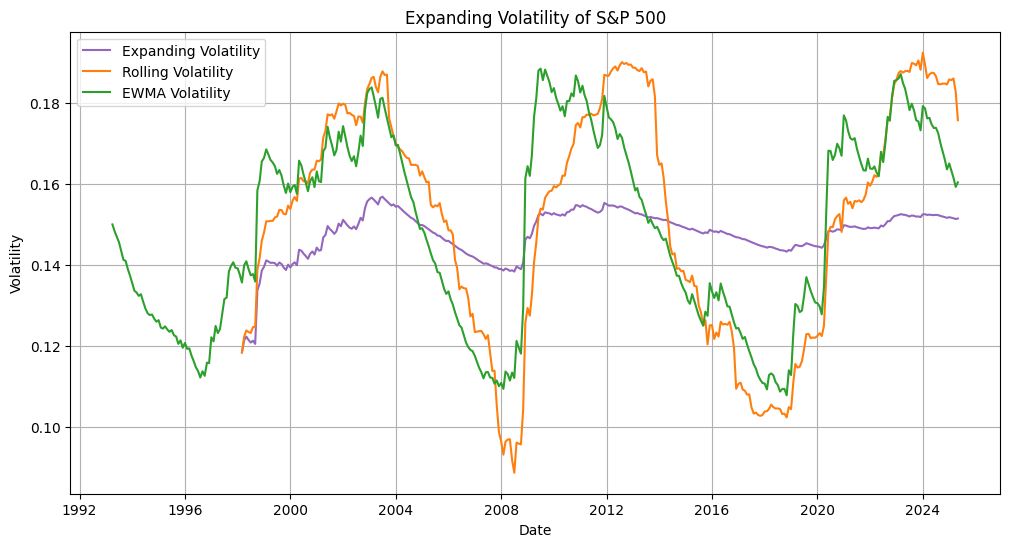

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(spy.index, spy['expanding'], label='Expanding Volatility', color='tab:purple')
plt.plot(spy.index, spy['rolling'], label='Rolling Volatility', color='tab:orange')
plt.plot(spy.index, spy['ewma'], label='EWMA Volatility', color='tab:green')
plt.title('Expanding Volatility of S&P 500')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()